<a href="https://colab.research.google.com/github/FLucioni/olimpiadas/blob/main/Copia_de_Athlete_Olympiada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

JUEGOS OLIMPICOS





Imports

In [4]:
import pandas as pd
import altair as alt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

import matplotlib.pyplot as plt
 #Libreria para insertar graficos
import numpy as np
#Libreria para insertar vectores


In [ ]:
#Conexion a CSV en GitHub
url = 'https://raw.githubusercontent.com/FLucioni/olimpiadas/games/olimpicos.csv'
df = pd.read_csv(url, sep = ';')
print(df.head())

In [ ]:
surveys_df = pd.read_csv(url, sep = ';')

In [7]:
dfmedals = df.query('Medal !="NaN"')

In [8]:
 #Dataframe con unicamente las columnas con NOC ,Medal (De quienes ganaron medallas)
 columnas = ['NOC','Medal'] 
df02 = dfmedals[[*columnas]]

DataFrames

In [ ]:

surveys_df #Dataframe Original
df02 #Dataframe con columnas: NOC y Medal
df #Cuando le aplicamos el Drop.na, unicamente quedan las personas que ganaron alguna medalla.


Analisis de los Datos


In [ ]:
#Ver tipos de datos
surveys_df.dtypes


In [ ]:
#Ver nombre de las columnas
surveys_df.columns

In [ ]:
#(Rows,Columns)
surveys_df.shape

In [ ]:
# contar cantidad de columnas.

df.count()

# Hay algunos valores de tipo "Height" y "Wheight" faltantes.
#Hay muchos valores de tipo "Medal" que no estan. Sera porque no ganaron medalla y los dejaron vacios en vez de poner Nan?

In [ ]:
#Cantidad de columnas Nulas
print(df.isnull().sum())

Limpieza de Columnas Vacias

In [17]:
#Borrar Columnas Vacias (Ya las borre)
df = df.dropna()

Analisis de los Datos

In [ ]:
# Agrupados por Sexo
df.Sex.value_counts()

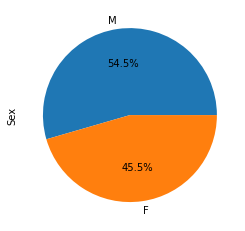

In [34]:
#Grafica - Sexo
serie = df.Sex.value_counts()
serie.plot.pie(autopct='%1.1f%%')

-

In [ ]:
#Top 5 Edades mas frecuentes
surveys_df['Age'].value_counts().head(5)

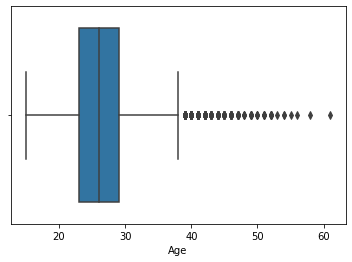

In [32]:
#Distribucion de las Edades
sns.boxplot(x=df['Age'])

In [ ]:
#Participante de mayor Edad: 71
surveys_df['Age'].max()
#No obtuvo ninguna medalla
surveys_df[surveys_df.Age == 71.0]

In [ ]:
#Particiopante mas adulto en ganar una Medalla
df['Age'].max()
df[df.Age == 61.0]

In [ ]:
#Participante de menor Edad: 12
surveys_df['Age'].min()
#No obtuvo ninguna medalla
surveys_df[surveys_df.Age == 12.0]

In [ ]:
import matplotlib.pyplot as plt
my_plot = surveys_df.plot("Age", "Year", kind="scatter")
plt.show() 

-

In [ ]:
#Top 5 Cantidad de medallas por pais
df02.groupby(['NOC']).count().sort_values('Medal',ascending = False).head(5)

In [ ]:
#Grafica
Top5P = df02.groupby(['NOC']).count().sort_values('Medal',ascending = False).head(5)
plt.plot(Top5P)

-





In [26]:
#Top 5 Cantidad de medallas de Hombres por Pais
df02[dfmedals.Sex =='M'].groupby(['NOC']).count().sort_values('Medal',ascending = False).head(5)


In [ ]:
Top5H = df02[dfmedals.Sex =='M'].groupby(['NOC']).count().sort_values('Medal',ascending = False).head(5)
#Grafica
plt.plot(Top5H)

-

In [29]:
#Top 5 Cantidad de medallas de Mujeres por Pais
df02[dfmedals.Sex =='F'].groupby(['NOC']).count().sort_values('Medal',ascending = False).head(5)
Top5M = df02[dfmedals.Sex =='F'].groupby(['NOC']).count().sort_values('Medal',ascending = False).head(5)

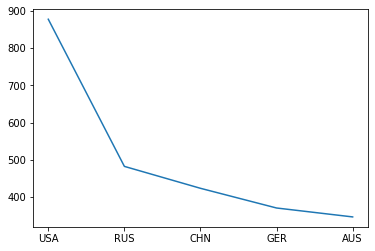

In [30]:
#Grafica
plt.plot(Top5M)

HASTA ACA LLEGA LO QUE HICE, A PARTIR DE ACA NO SABRIA QUE HAY QUE BORRAR, QUE HAY QUE DEJAR, ETC
# Nueva sección

In [ ]:

grouped_data = surveys_df.groupby('Sex')

In [ ]:
grouped_data.describe()

In [ ]:
grouped_data.mean()

,ID,Age,Height,Year
Sex,,,,
F,41562.248141,25.042484,168.864579,2008.284073
M,43410.997765,26.413914,180.944354,2007.824007


In [ ]:
print(surveys_df[surveys_df.Medal =='Gold'])

In [ ]:
#Top 10 Modalidades con mas Participantes
surveys_df.Event.value_counts().head(10)

NameError: ignored

In [ ]:
print (surveys_df.groupby(by=['Medal','NOC']).count().groupby(level=[0]).cumsum())

              ID  Name   Sex   Age  Height  Weight  Team  Year  Season  City  \
Medal  NOC                                                                     
Bronze AFG     2     2     2     2       2       2     2     2       2     2   
       ALG     6     6     6     6       6       6     6     6       6     6   
       ARG    64    64    64    64      64      64    64    64      64    64   
       ARM    73    73    73    73      72      73    73    73      73    73   
       AUS   320   320   320   320     319     320   320   320     320   320   
...          ...   ...   ...   ...     ...     ...   ...   ...     ...   ...   
Silver USA  3963  3963  3963  3963    3958    3940  3963  3963    3963  3963   
       UZB  3969  3969  3969  3969    3964    3946  3969  3969    3969  3969   
       VEN  3970  3970  3970  3970    3965    3947  3970  3970    3970  3970   
       VIE  3973  3973  3973  3973    3968    3950  3973  3973    3973  3973   
       ZIM  3977  3977  3977  3977    39

In [ ]:
df_pais_medals = surveys_df[['NOC','Medal']]

In [ ]:
df_pais_medals

,NOC,Medal
0,ROU,NaN
1,ESP,NaN
2,ESP,NaN
3,ESP,NaN
4,ESP,NaN
...,...,...
167051,NaN,NaN
167052,NaN,NaN
167053,NaN,NaN
167054,NaN,NaN


In [ ]:
print(df_pais_medals["Medal"].value_counts())

Bronze    4152
Gold      4009
Silver    3977
Name: Medal, dtype: int64


In [ ]:
group=df_pais_medals.groupby(["NOC","Medal"])
medallas = group.size().reset_index(name='total_medal')
print(medallas)

     NOC   Medal  total_medal
0    AFG  Bronze            2
1    ALG  Bronze            4
2    ALG    Gold            2
3    ALG  Silver            4
4    ARG  Bronze           58
..   ...     ...          ...
278  VIE    Gold            1
279  VIE  Silver            3
280  ZIM  Bronze            1
281  ZIM    Gold            2
282  ZIM  Silver            4

[283 rows x 3 columns]


In [44]:
medallas.NOC.size()

NameError: ignored

In [ ]:
url = 'https://raw.githubusercontent.com/FLucioni/olimpiadas/main/medallas_noc.csv'
df1 = pd.read_csv(url, sep = ';')
print(df1.head())

   NOC   Gold  Silver  Bronze  Unnamed: 4  Unnamed: 5
0  ROU   61.0    22.0    56.0         NaN         NaN
1  ESP   28.0   135.0    87.0         NaN         NaN
2  ITA   94.0   145.0   177.0         NaN         NaN
3  AZE    7.0    11.0    25.0         NaN         NaN
4  FRA  132.0   166.0   138.0         NaN         NaN


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
url ='https://raw.githubusercontent.com/FLucioni/olimpiadas/main/medallones.csv'
dt = pd.read_csv(url, sep = ';')
print(dt.head())


   NOC medalla  cantidad
0  ABR  Silver         3
1  AFG    Gold         0
2  AFG  Silver         0
3  AFG  Bronze         2
4  ALG    Gold         2


In [ ]:
df1.dropna(how='all', axis=1, inplace=True) 
print(df1.head())

   NOC   Gold  Silver  Bronze
0  ROU   61.0    22.0    56.0
1  ESP   28.0   135.0    87.0
2  ITA   94.0   145.0   177.0
3  AZE    7.0    11.0    25.0
4  FRA  132.0   166.0   138.0


KeyboardInterrupt: ignored

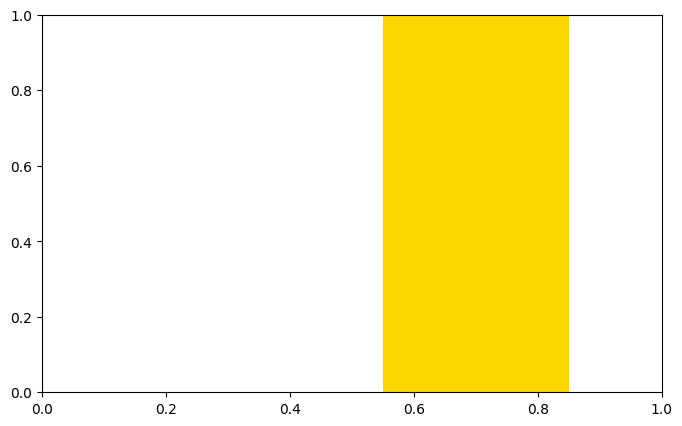

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)  # 800x500 px

bar_width = 0.30
x = np.arange(df1.index.size)

golden_medals = ax.bar(x - bar_width, df1['Gold'],
                       bar_width, label='Oro', color='#ffd700')
silver_medals = ax.bar(x, df1['Silver'],
                       bar_width, label='Plata', color='#aaa9ad')
bronze_medals = ax.bar(x + bar_width, df1['Silver'],
                       bar_width, label='Bronce', color='#cd7f32')

ax.set_xticks(x)
ax.set_xticklabels(df1.index, rotation=90)
ax.legend()

# Etiquetas en barras
ax.bar_label(golden_medals, padding=3)
ax.bar_label(silver_medals, padding=3)
ax.bar_label(bronze_medals, padding=3)

ax.spines['right'].set_visible(False)  # ocultar borde derecho
ax.spines['top'].set_visible(False)    # ocultar borde superior

fig.tight_layout()  # ajustar elementos al tamaño de la figura
fig

In [ ]:
alt.Chart(dt).mark_bar().encode(
    x=alt.X('sum(cantidad):Q', stack='zero', axis=alt.Axis(title='Cantidad de Medallas')),
    y=alt.Y('NOC:N', sort='-x'),
    color=alt.Color('medalla:N', scale=alt.Scale(
        domain = ['Gold', 'Silver', 'Bronze'],                   
        range = ['gold', 'silver', 'brown'])),
    order=alt.Order(
      'medalla',
      sort='descending'
    ), tooltip = ('sum(cantidad)', 'medalla')
    ).properties(width=1000, height=3000)

In [ ]:
fig = px.bar(dt, x="medalla", y="cantidad", color="NOC",
             pattern_shape="NOC", pattern_shape_sequence=[".", "x", "+"])
fig.show()